## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

import plotly.express as px
import plotly.graph_objects as go

sns.set()

## 1 Data Wrangling

### Load Data

In [2]:
# The supplied CSV data file is the DataSet directory
weather_df = pd.read_csv('../data/weather.csv')
spray_df = pd.read_csv('../data/spray.csv')
train_df = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


### Check Data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [7]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [8]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [9]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


### Clean Train Data

In [10]:
## Drop all irrelevant columns
train_df.drop(columns = ['Address','AddressNumberAndStreet'], inplace = True)
train_df.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,9,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,4,0


In [11]:
train_df.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [12]:
train_df['Date'] = train_df['Date'].apply(pd.to_datetime)

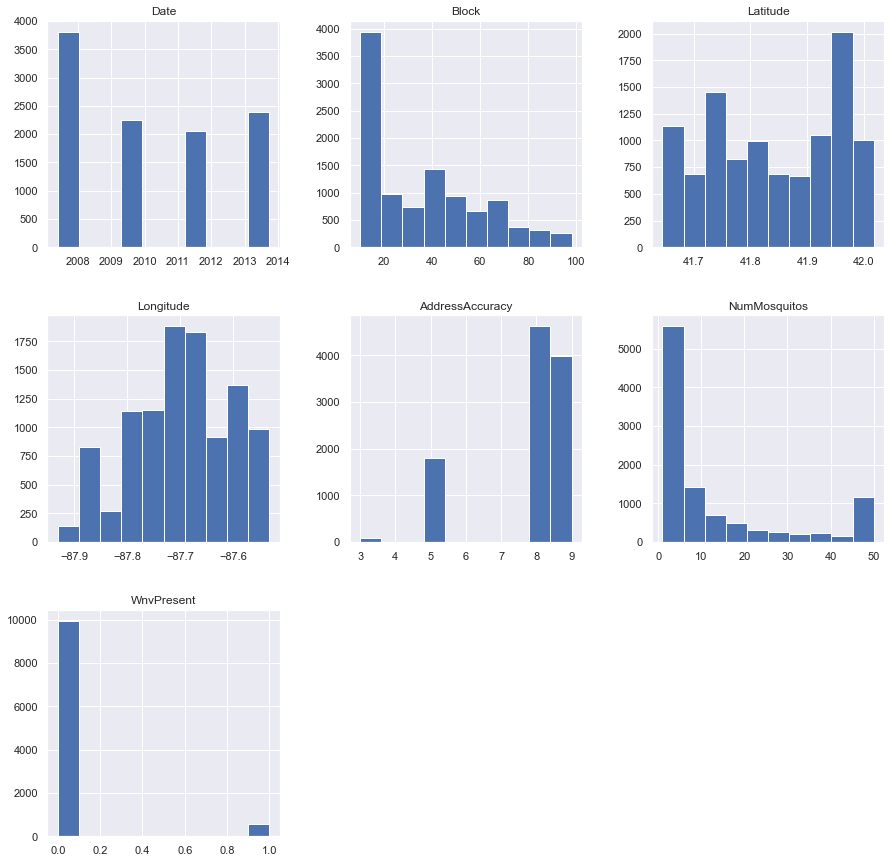

In [13]:
train_df.hist(figsize=(15, 15))
plt.show()

### Clean Weather Data

In [14]:
# Will ignore station two data for the first try. Will try to come back later
weather_df1 = weather_df.loc[weather_df['Station']==1]
weather_df1.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [15]:
weather_df1.reset_index(drop = True)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,2014-10-27,77,51,64,16,51,58,1,0,...,,0,M,0.0,0.00,28.92,29.66,12.0,19,12.9
1468,1,2014-10-28,68,45,57,10,38,47,8,0,...,,0,M,0.0,T,29.15,29.85,14.8,26,15.6
1469,1,2014-10-29,49,36,43,-4,32,40,22,0,...,,0,M,0.0,0.00,29.36,30.06,9.5,29,9.9
1470,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5


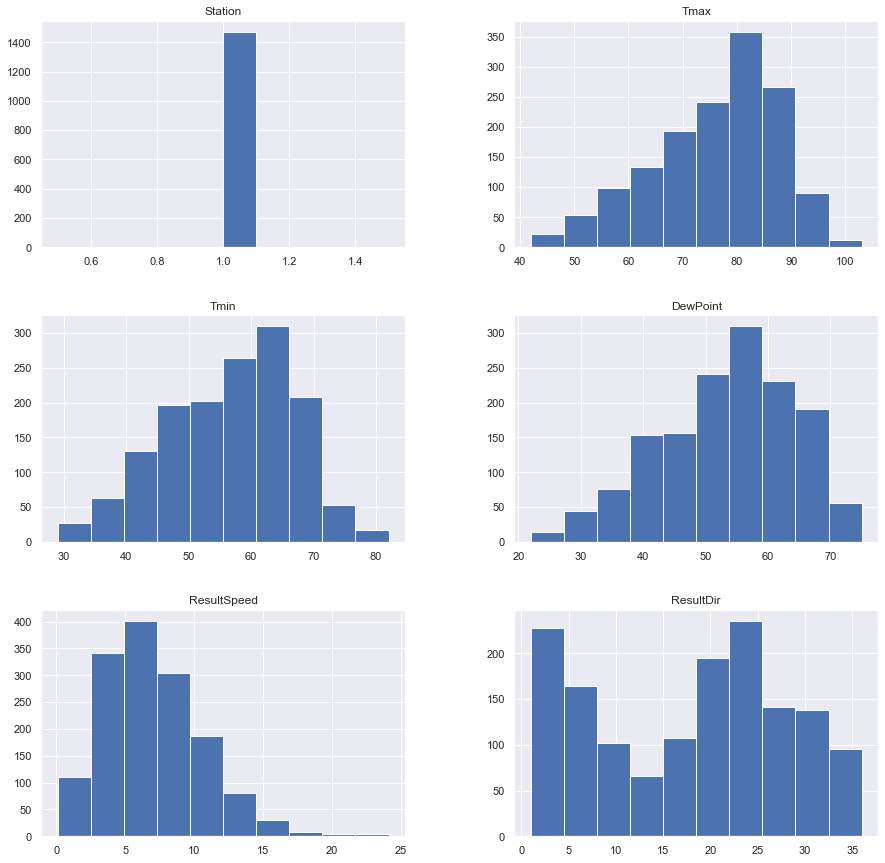

In [16]:
weather_df1.hist(figsize=(15, 15))
plt.show()

In [17]:
# Inspect suspicious looking column
print(weather_df1['Water1'].value_counts())

M    1472
Name: Water1, dtype: int64


In [18]:
print(weather_df1['PrecipTotal'].value_counts())

0.00    794
  T     163
0.01     54
0.02     30
0.03     20
       ... 
1.49      1
1.02      1
2.79      1
3.64      1
1.58      1
Name: PrecipTotal, Length: 126, dtype: int64


In [19]:
print(weather_df1['CodeSum'].value_counts())

                      805
RA                    161
RA BR                 128
BR                     66
TSRA RA BR             48
                     ... 
TS TSRA RA BR VCTS      1
TSRA RA VCTS            1
HZ VCTS                 1
TS TSRA RA BR HZ        1
RA SN                   1
Name: CodeSum, Length: 67, dtype: int64


In [20]:
# Lets drop again irrelevant columns
weather_df1.drop(columns = ['Water1','CodeSum'], inplace = True)
weather_df1.head()

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,0,0.0,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,0,0.0,0.00,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,0,0.0,0.00,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,0,0.0,T,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,0,0.0,T,29.40,30.10,11.7,7,12.0


In [21]:
# Replace T in PrecipTotal with mode

In [22]:
weather_df1.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'Depth', 'SnowFall',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

In [23]:
#Change date colun to datetime
weather_df1['Date'] = weather_df1['Date'].apply(pd.to_datetime)

/var/folders/rt/9nm_7gz557x94zz8z2yl0fgm0000gn/T/ipykernel_30855/579161541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df1['Date'] = weather_df1['Date'].apply(pd.to_datetime)


In [24]:
# Convert all object columns to numeric except date
# cols_tmp = weather_df1.columns[weather_df1.dtypes.eq('object')]
# cols = [i for i in cols_tmp if i != 'Date']

cols = weather_df1.columns[weather_df1.dtypes.eq('object')]

weather_df1[cols] = weather_df1[cols].apply(pd.to_numeric, errors='coerce')
weather_df1.head()

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56.0,0,2,448,1849,0,0.0,0.0,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47.0,14,0,447,1850,0,0.0,0.0,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48.0,9,0,446,1851,0,0.0,0.0,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50.0,7,0,444,1852,0,0.0,NaN,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49.0,5,0,443,1853,0,0.0,NaN,29.40,30.10,11.7,7,12.0


In [25]:
weather_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 2942
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      1472 non-null   int64         
 1   Date         1472 non-null   datetime64[ns]
 2   Tmax         1472 non-null   int64         
 3   Tmin         1472 non-null   int64         
 4   Tavg         1472 non-null   int64         
 5   Depart       1472 non-null   int64         
 6   DewPoint     1472 non-null   int64         
 7   WetBulb      1469 non-null   float64       
 8   Heat         1472 non-null   int64         
 9   Cool         1472 non-null   int64         
 10  Sunrise      1472 non-null   int64         
 11  Sunset       1472 non-null   int64         
 12  Depth        1472 non-null   int64         
 13  SnowFall     1460 non-null   float64       
 14  PrecipTotal  1309 non-null   float64       
 15  StnPressure  1470 non-null   float64       
 16  SeaLev

In [26]:
# Checking if there are null values
weather_df1.isnull().sum()

Station          0
Date             0
Tmax             0
Tmin             0
Tavg             0
Depart           0
DewPoint         0
WetBulb          3
Heat             0
Cool             0
Sunrise          0
Sunset           0
Depth            0
SnowFall        12
PrecipTotal    163
StnPressure      2
SeaLevel         5
ResultSpeed      0
ResultDir        0
AvgSpeed         0
dtype: int64

In [27]:
# Replace NaN with mode values
re_cols = weather_df1.columns[weather_df1.isnull().sum() !=0]

for each_col in re_cols:
    weather_df1[each_col].fillna(weather_df1[each_col].mode()[0], inplace=True)

# Check if any null left 
weather_df1.isnull().sum()

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
Depth          0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

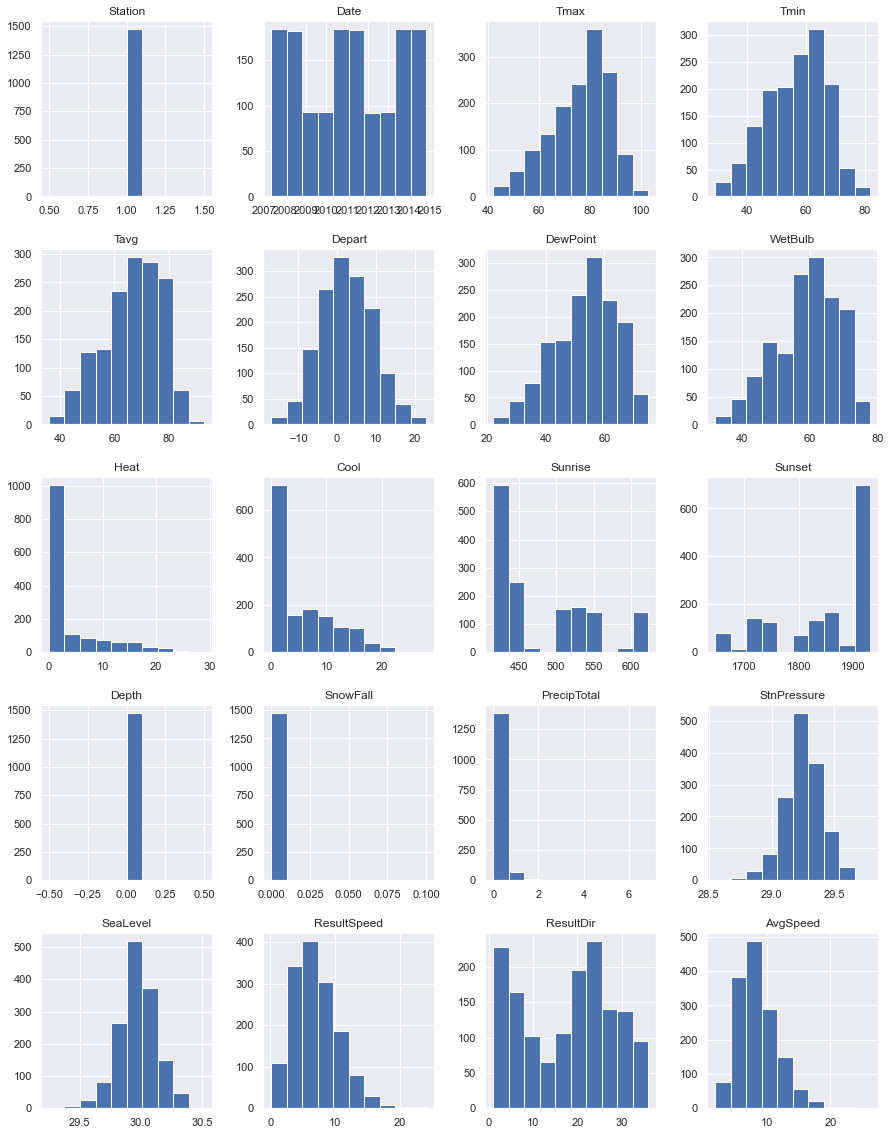

In [28]:
weather_df1.hist(figsize=(15, 20))
plt.show()

In [29]:
# Check suscpicious looking data
print(weather_df1['SnowFall'].value_counts())
print(weather_df1['Depth'].value_counts())
print(weather_df1['PrecipTotal'].value_counts())

0.0    1471
0.1       1
Name: SnowFall, dtype: int64
0    1472
Name: Depth, dtype: int64
0.00    957
0.01     54
0.02     30
0.03     20
0.04     18
       ... 
1.49      1
1.02      1
2.79      1
3.64      1
1.58      1
Name: PrecipTotal, Length: 125, dtype: int64


In [30]:
# Drop if they are not very useful
weather_df1.drop(columns = ['SnowFall','Depth', 'Sunrise', 'Sunset'], inplace = True)

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
merged_df = pd.merge(train_df, weather_df1, how = 'outer', on = 'Date')

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11883 entries, 0 to 11882
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             11883 non-null  datetime64[ns]
 1   Species          10506 non-null  object        
 2   Block            10506 non-null  float64       
 3   Street           10506 non-null  object        
 4   Trap             10506 non-null  object        
 5   Latitude         10506 non-null  float64       
 6   Longitude        10506 non-null  float64       
 7   AddressAccuracy  10506 non-null  float64       
 8   NumMosquitos     10506 non-null  float64       
 9   WnvPresent       10506 non-null  float64       
 10  Station          11883 non-null  int64         
 11  Tmax             11883 non-null  int64         
 12  Tmin             11883 non-null  int64         
 13  Tavg             11883 non-null  int64         
 14  Depart           11883 non-null  int64

In [33]:
merged_df.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.0,N OAK PARK AVE,T002,41.954690,-87.800991,9.0,1.0,0.0,...,58,65.0,0,9,0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,CULEX RESTUANS,41.0,N OAK PARK AVE,T002,41.954690,-87.800991,9.0,1.0,0.0,...,58,65.0,0,9,0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,CULEX RESTUANS,62.0,N MANDELL AVE,T007,41.994991,-87.769279,9.0,1.0,0.0,...,58,65.0,0,9,0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,CULEX PIPIENS/RESTUANS,79.0,W FOSTER AVE,T015,41.974089,-87.824812,8.0,1.0,0.0,...,58,65.0,0,9,0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,CULEX RESTUANS,79.0,W FOSTER AVE,T015,41.974089,-87.824812,8.0,4.0,0.0,...,58,65.0,0,9,0.0,29.39,30.11,5.8,18,6.5


In [34]:
merged_df.dropna(inplace = True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             10506 non-null  datetime64[ns]
 1   Species          10506 non-null  object        
 2   Block            10506 non-null  float64       
 3   Street           10506 non-null  object        
 4   Trap             10506 non-null  object        
 5   Latitude         10506 non-null  float64       
 6   Longitude        10506 non-null  float64       
 7   AddressAccuracy  10506 non-null  float64       
 8   NumMosquitos     10506 non-null  float64       
 9   WnvPresent       10506 non-null  float64       
 10  Station          10506 non-null  int64         
 11  Tmax             10506 non-null  int64         
 12  Tmin             10506 non-null  int64         
 13  Tavg             10506 non-null  int64         
 14  Depart           10506 non-null  int64

In [35]:
merged_df['day'] = merged_df['Date'].dt.day
merged_df['doy'] = merged_df['Date'].dt.dayofyear
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             10506 non-null  datetime64[ns]
 1   Species          10506 non-null  object        
 2   Block            10506 non-null  float64       
 3   Street           10506 non-null  object        
 4   Trap             10506 non-null  object        
 5   Latitude         10506 non-null  float64       
 6   Longitude        10506 non-null  float64       
 7   AddressAccuracy  10506 non-null  float64       
 8   NumMosquitos     10506 non-null  float64       
 9   WnvPresent       10506 non-null  float64       
 10  Station          10506 non-null  int64         
 11  Tmax             10506 non-null  int64         
 12  Tmin             10506 non-null  int64         
 13  Tavg             10506 non-null  int64         
 14  Depart           10506 non-null  int64

In [37]:
# Check the number in each species
merged_df['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

## 2 Exploratory Data Analysis (EDA)

In [38]:
# Plot No of Mosquitoes on Chicago map

def plotmosqonmap(df, year, color1, color2):
    ax=chicago_map.plot(figsize=(8, 8));
    ax.scatter(df.loc[df.year==year,'Longitude'],
               df.loc[df.year==year,'Latitude'],
               s = df.loc[df.year==year,'NumMosquitos']*5,
               marker = 'o', facecolors = 'none', edgecolor = color1)
    ax.scatter(df.loc[df.year==year,'Longitude'],
               df.loc[df.year==year,'Latitude'],
               s = df.loc[df.year==year,'WnvPresent']*5,
               marker = 'd', facecolors = 'none', edgecolor = color2)
    plt.show()

/var/folders/rt/9nm_7gz557x94zz8z2yl0fgm0000gn/T/ipykernel_30855/2272922372.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pvt = pd.DataFrame(merged_df.groupby(['Latitude','Longitude'])['NumMosquitos', 'WnvPresent'].sum().sort_values(by = 'NumMosquitos', ascending = False))
/var/folders/rt/9nm_7gz557x94zz8z2yl0fgm0000gn/T/ipykernel_30855/2272922372.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cb, cax= cax)


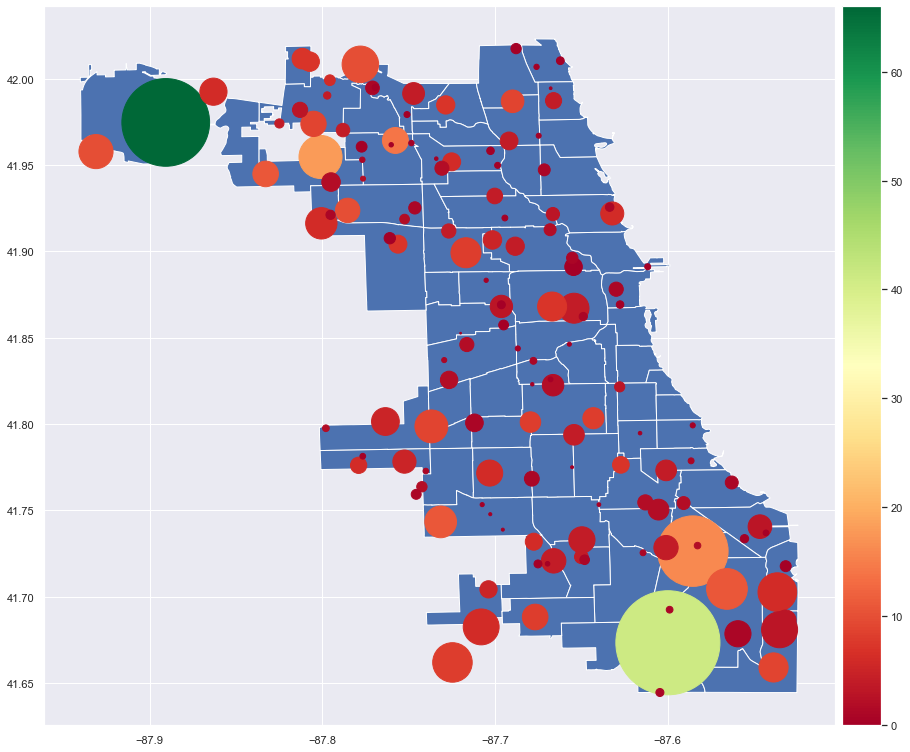

In [39]:
pvt = pd.DataFrame(merged_df.groupby(['Latitude','Longitude'])['NumMosquitos', 'WnvPresent'].sum().sort_values(by = 'NumMosquitos', ascending = False))
pvt.reset_index(inplace = True)

from mpl_toolkits.axes_grid1 import make_axes_locatable

chicago_map = gpd.read_file('../data/geo_export_fd8fe833-d02f-401f-9fd0-7b2e93a358a6.shp')

fig, ax = plt.subplots(figsize=(15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

chicago_map.plot(ax=ax, cax=cax, legend= True);
cb = ax.scatter(pvt['Longitude'], pvt['Latitude'], s = pvt['NumMosquitos']*.5, c =pvt['WnvPresent'], cmap = 'RdYlGn')
plt.colorbar(cb, cax= cax)

#ax.scatter(pvt['Longitude'], pvt['Latitude'], s = pvt['NumMosquitos']*.1, c =pvt['WnvPresent'], marker = 'o', facecolors = 'none', color = 'red')
#ax.scatter(pvt['Longitude'], pvt['Latitude'], s = pvt['WnvPresent']*2, marker = 'o', facecolors = 'yellow', color = 'yellow')

### Let's look some data and their distribution

<AxesSubplot:>

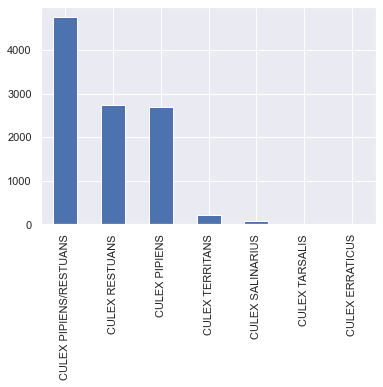

In [40]:
# Plot bar graphs of Counts of Species
merged_df['Species'].value_counts().plot.bar()

In [41]:
def plotbyyear(df, columns):
    years = np.unique(df.year)
    ncol = len(years)
    nrow = len(columns)
    fig, ax = plt.subplots(nrow, ncol, figsize=(15, 3*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        color= ['g','b','r','y']
        for j, yr in enumerate(years):
            ax[i,j].plot(df.loc[df.year==yr,col].apply(int), color=color[j])
            ax[i,0].set_ylabel(col)
            ax[0,j].set_title(yr)

In [42]:
def distplotbyyear(df, columns):
    years = np.unique(df.year)
    ncol = len(years)
    nrow = len(columns)
    fig, ax = plt.subplots(nrow, ncol, figsize=(15, 3*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        color= ['g','b','r','y']
        for j, yr in enumerate(years):
            sns.histplot(df.loc[df.year==yr,col].apply(int), color=color[j], kde=True, stat='density',ax =ax[i,j] )
            ax[0,j].set_title(yr)

In [43]:
cols = ['NumMosquitos','WnvPresent',
        'Tmax','Tmin', 'Tavg','Depart', 'DewPoint',
        'WetBulb','Heat','Cool', 'PrecipTotal',     'StnPressure',
        'SeaLevel', 'ResultSpeed','ResultDir','AvgSpeed']

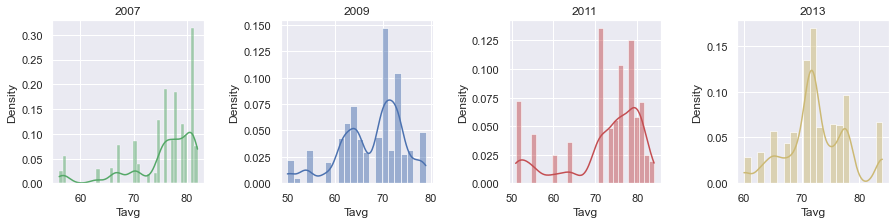

In [44]:
distplotbyyear(merged_df, ['Tavg'])

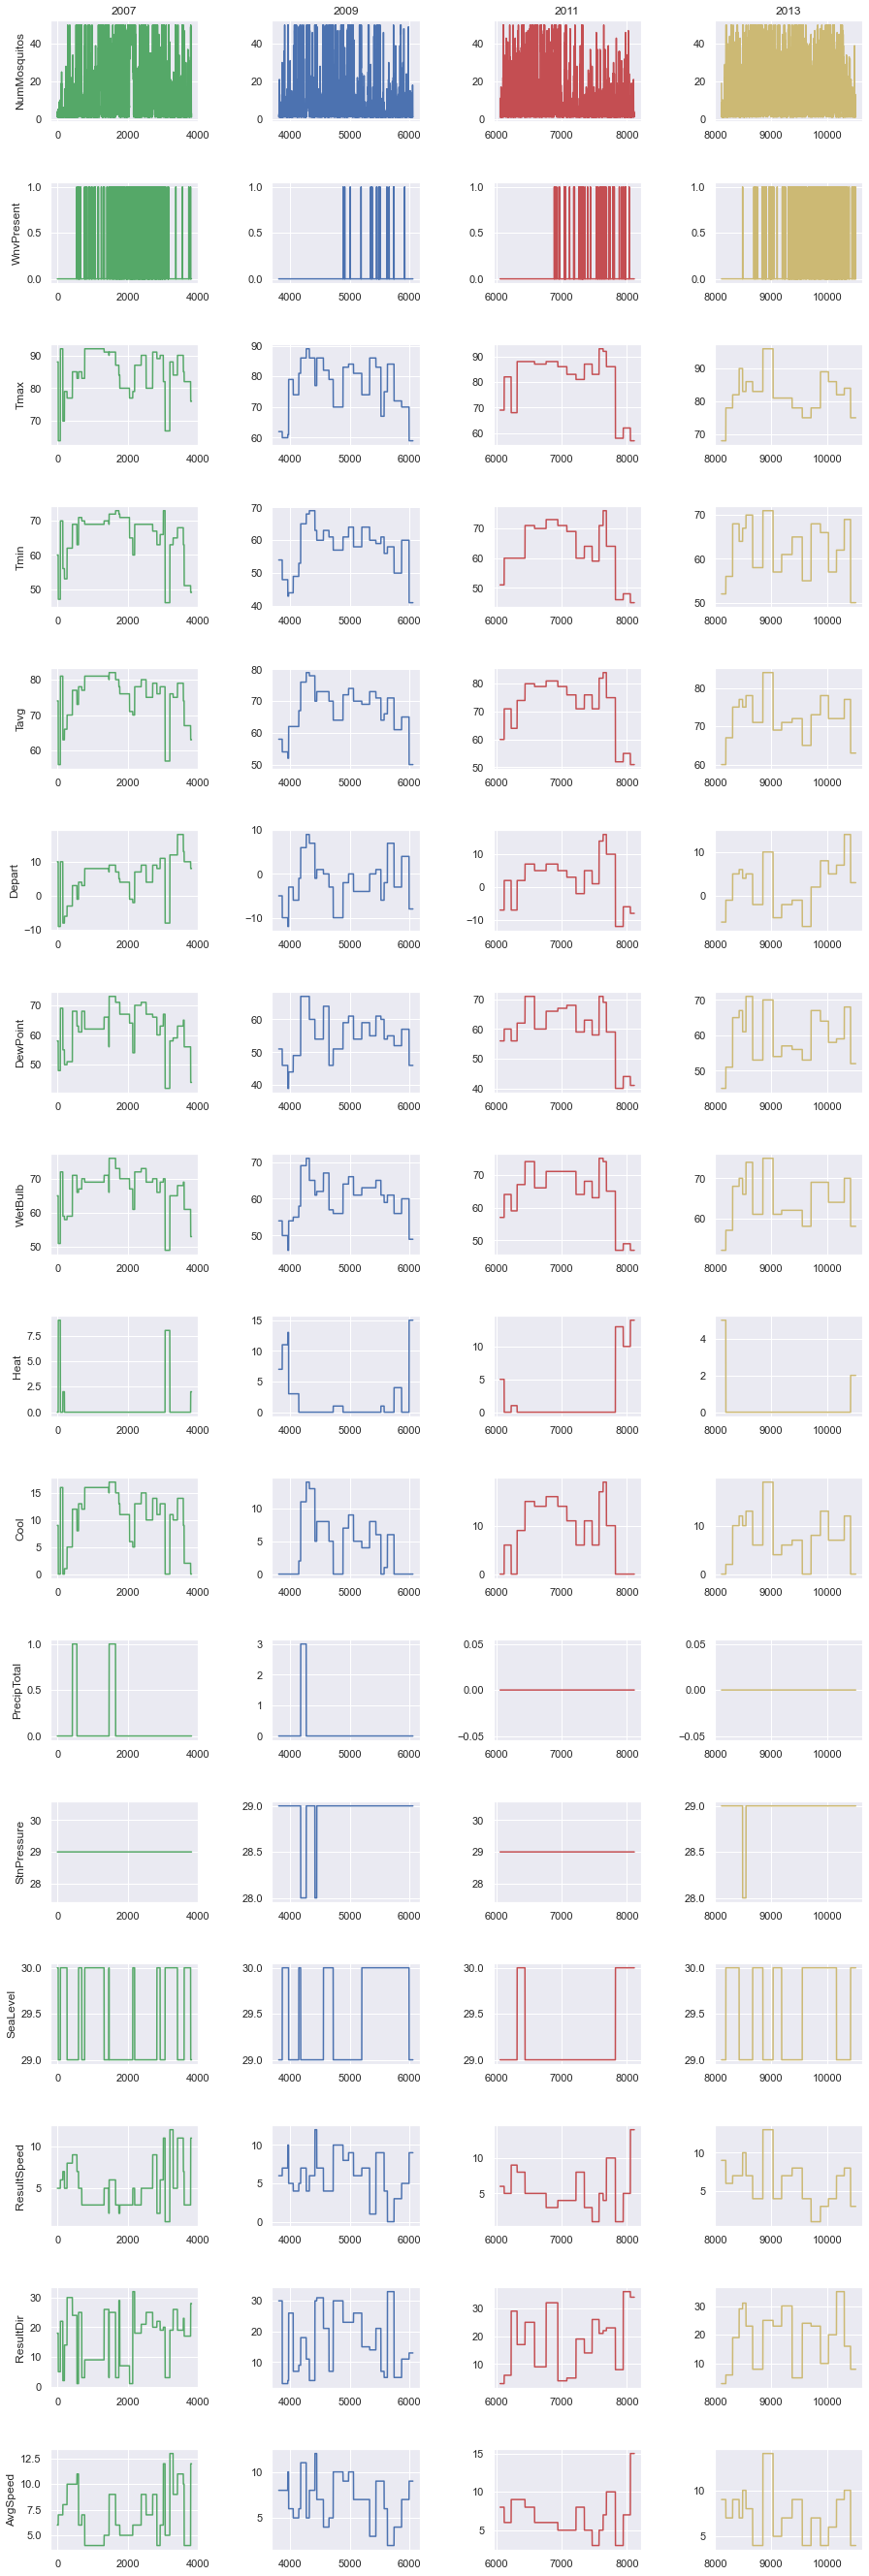

In [45]:
plotbyyear(merged_df,cols)

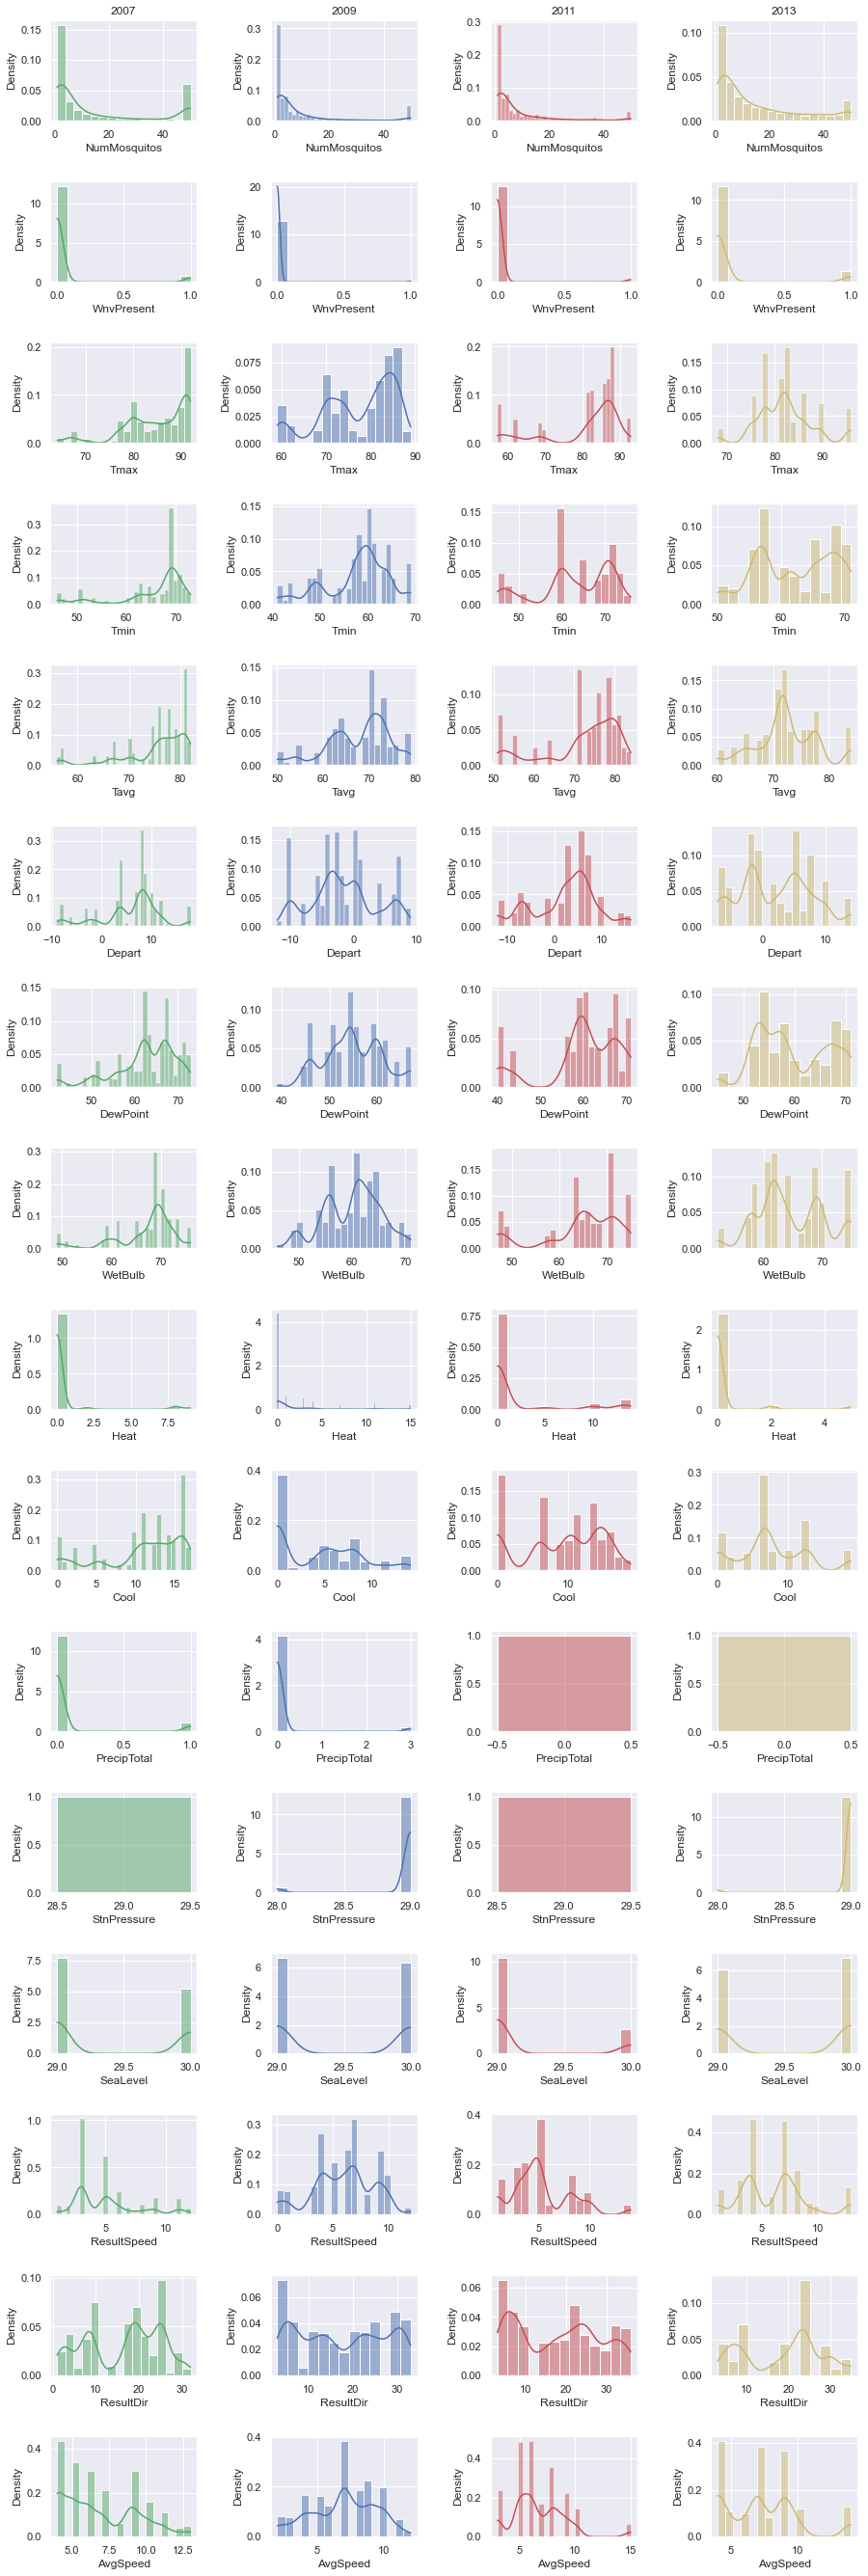

In [46]:
distplotbyyear(merged_df, cols)

### Lets check what variable impacts the presence of Virus

In [47]:
# What species is associated with the presence of virus
species_vs_virus = merged_df[['Species', 'WnvPresent']].groupby('Species', as_index= False).sum().sort_values(by = 'WnvPresent',ascending=False).reset_index(drop = True)
species_vs_virus

,Species,WnvPresent
0,CULEX PIPIENS/RESTUANS,262.0
1,CULEX PIPIENS,240.0
2,CULEX RESTUANS,49.0
3,CULEX ERRATICUS,0.0
4,CULEX SALINARIUS,0.0
5,CULEX TARSALIS,0.0
6,CULEX TERRITANS,0.0


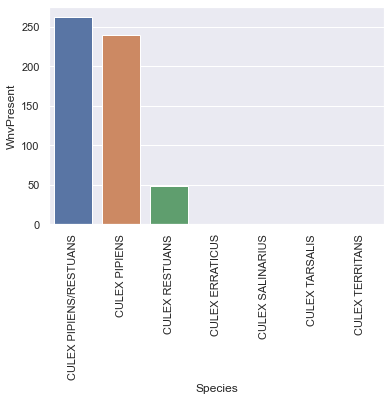

In [48]:
fig, ax = plt.subplots()
sns.barplot(data=species_vs_virus, x = 'Species', y = 'WnvPresent', ax = ax)
plt.xticks(rotation=90)
# ax2 = ax.twinx()
# merged_df['Species'].value_counts().plot.bar(ax=ax2)

plt.show()

Looks like the some mosquito species are only associated with the presence of virus but what happens if we normalize by the number of species 

In [49]:
 def boxplots(df, columns, ncol=None):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 5*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.boxplot(data = df, x = 'year',y = col, hue = 'WnvPresent', ax=ax, showfliers=False)
        ax.set(ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

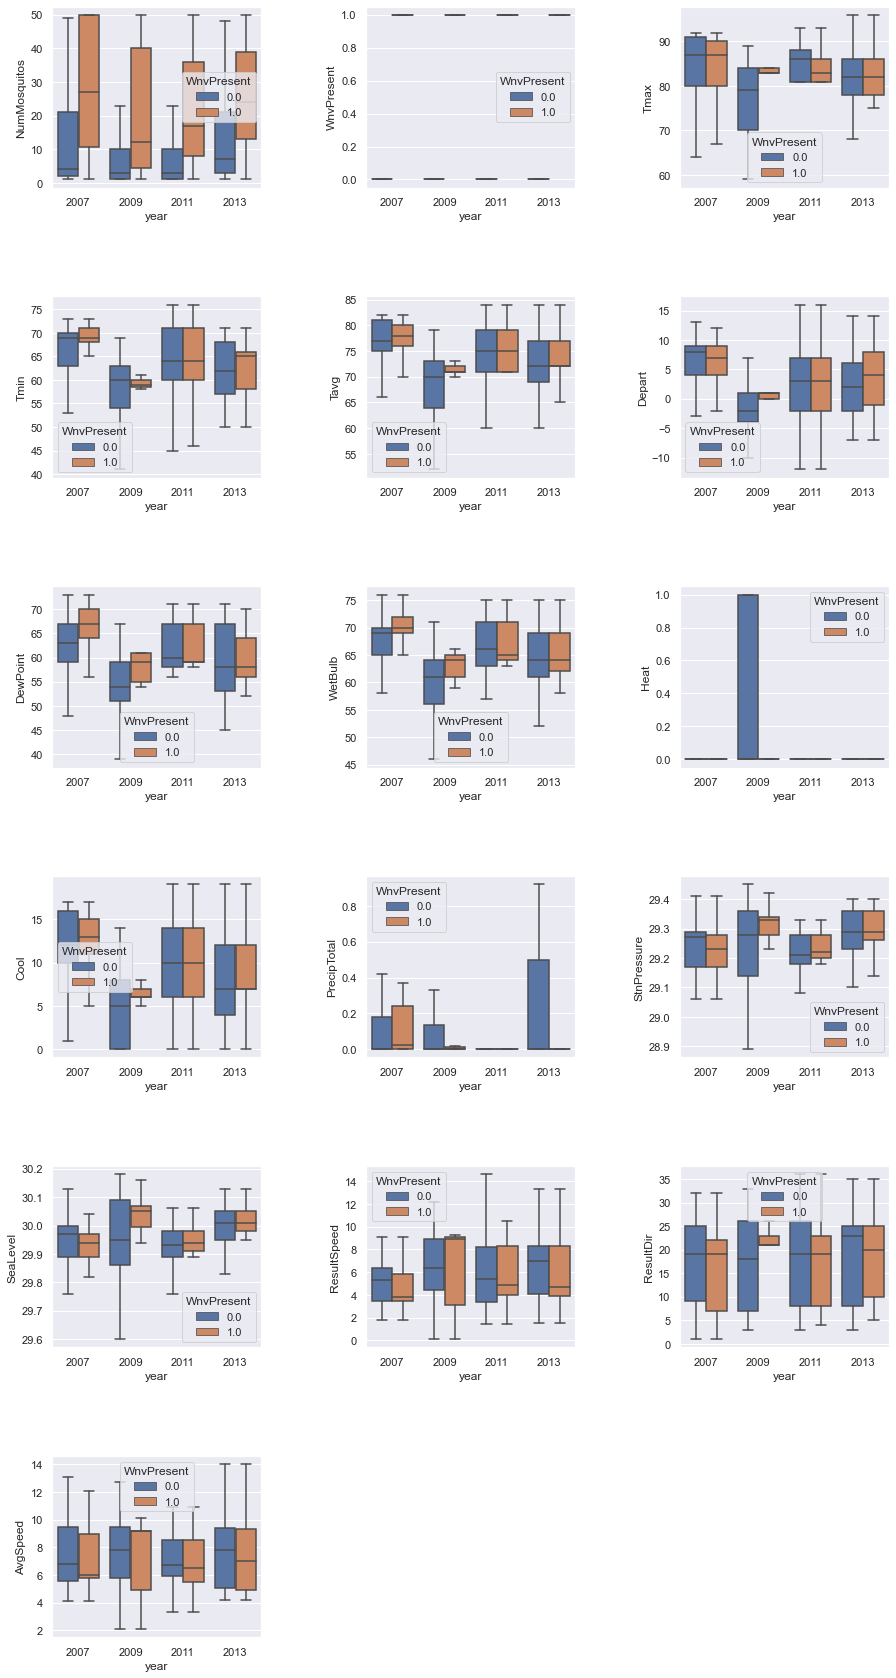

In [50]:
boxplots(merged_df, cols, ncol= 3)

### Some Key correlations Metric

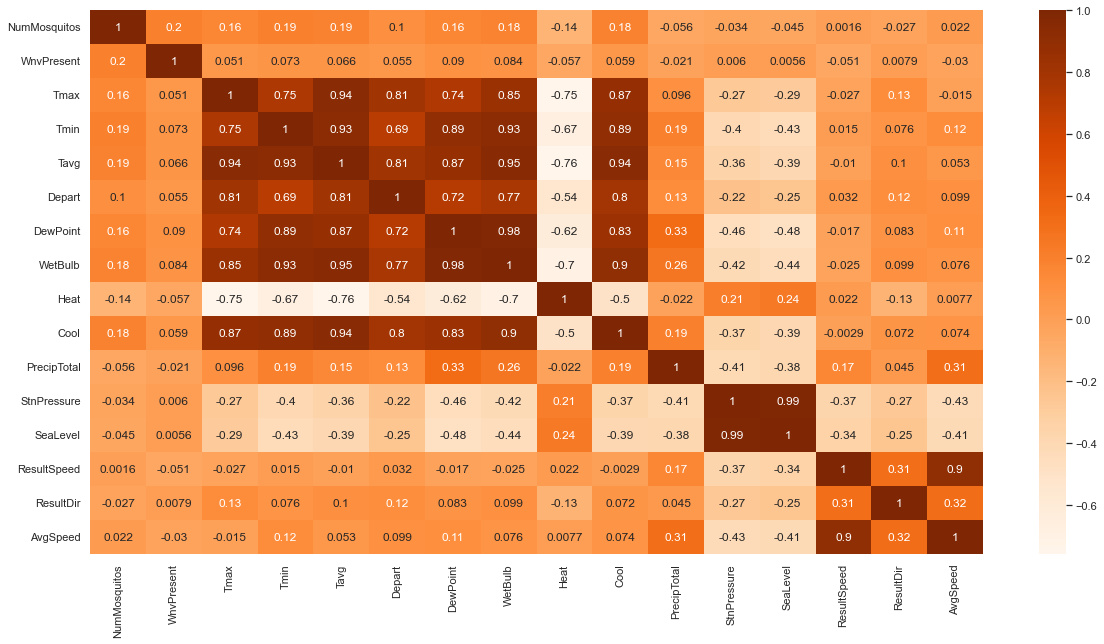

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(merged_df[cols].corr(), annot=True, cmap="Oranges" ,ax = ax)
plt.show()

### Calculate to see if correlation increases with lag

In [52]:
def corrplot(df, columns, start, stop, step, ncol=None):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil((stop-start) / (step*ncol)))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    
    for i, x in enumerate(range(start, stop, step)):
        #print(i)
        ax = axes.flatten()[i]
        sns.heatmap((df[columns].shift(x).corr()[['WnvPresent']]-df[columns].corr()[['WnvPresent']]), annot=True, cmap="Oranges" ,ax = ax)
        ax.set(xlabel=['Shift',x])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
    

In [53]:
#new_cols =[val for i, val in enumerate(cols) if val != 'WnvPresent']

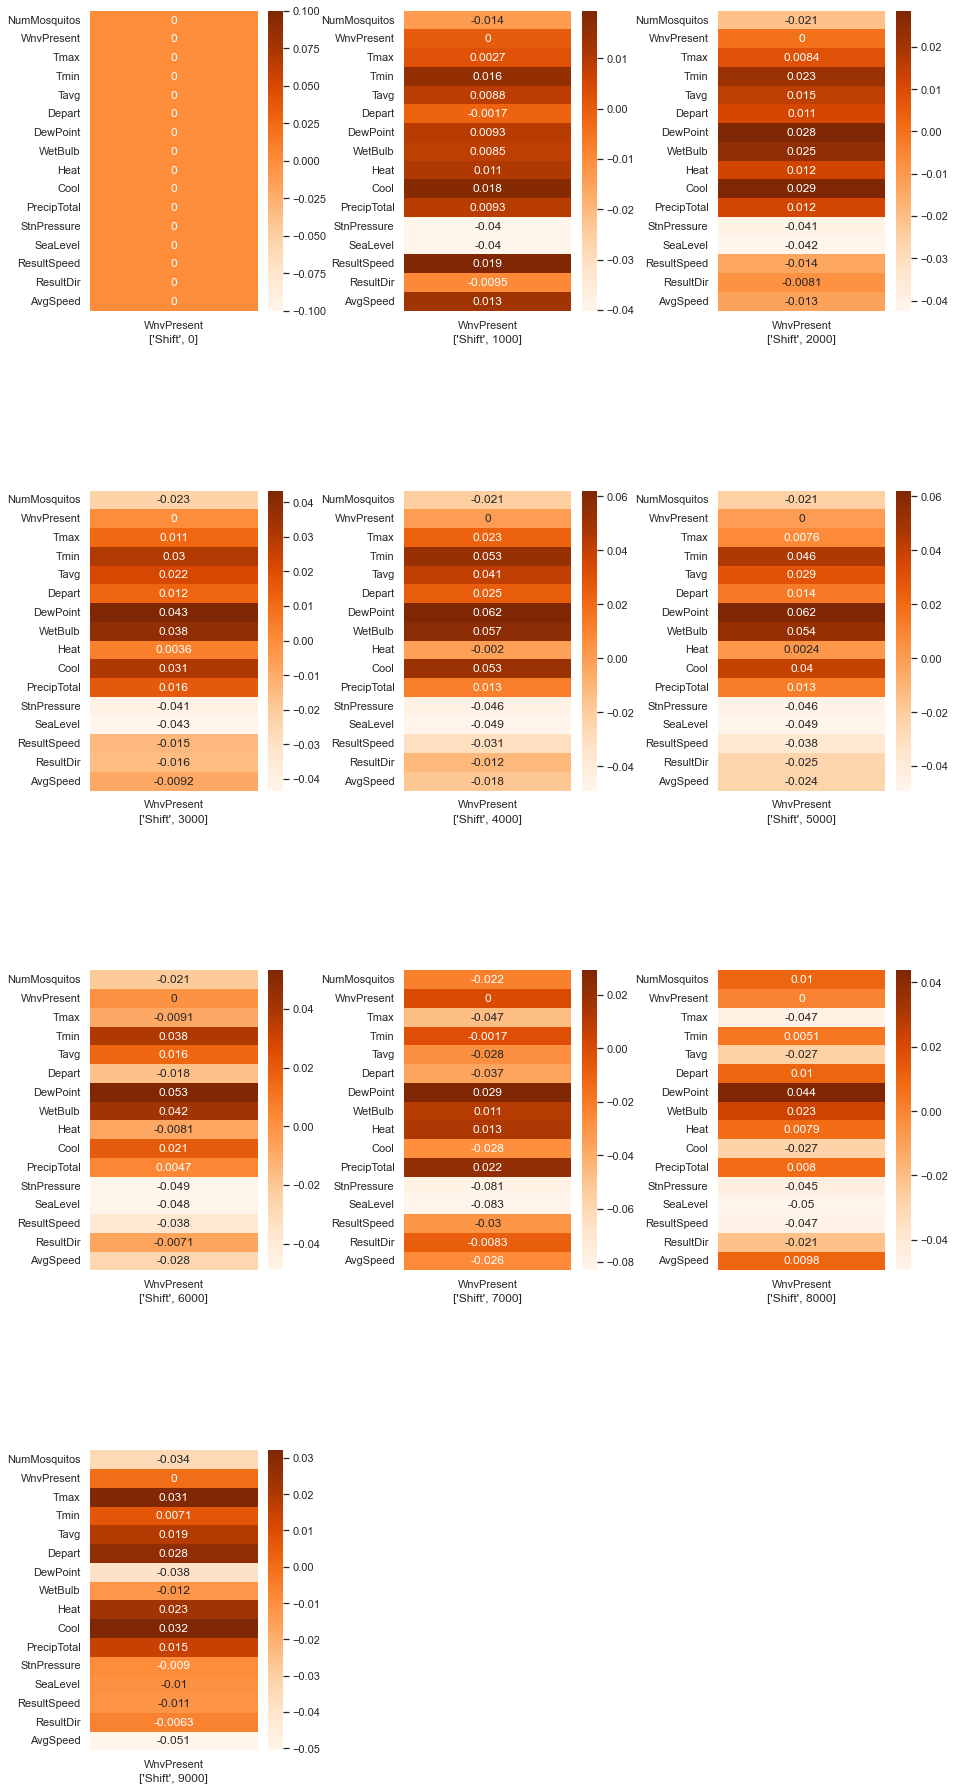

In [54]:
corrplot(merged_df, cols, 0, 10000, 1000, ncol = 3)

## 3 Feature Engineering

### Onehot encoder

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [126]:
train_df = []
test_df =[]
test_df = test.copy()
train_df = merged_df.copy()

In [127]:
# ONEHOT ENCODING
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(train_df[['Species', 'Trap', 'Street']]).toarray())
train_df0 = pd.concat([train_df, enc_df], axis =1)
train_df0 = train_df0.drop(['Species', 'Trap', 'Street'],axis=1)
train_df0.head()



,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,261,262,263,264,265,266,267,268,269,270
0,2007-05-29,41.0,41.954690,-87.800991,9.0,1.0,0.0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-29,41.0,41.954690,-87.800991,9.0,1.0,0.0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-29,62.0,41.994991,-87.769279,9.0,1.0,0.0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-29,79.0,41.974089,-87.824812,8.0,1.0,0.0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-29,79.0,41.974089,-87.824812,8.0,4.0,0.0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
X_train_df0 = train_df0.drop(['WnvPresent'], axis=1)
y_train_df0 = train_df0['WnvPresent']

In [129]:
train_df1 = []
test_df1 =[]
test_df1 = test.copy()
train_df1 = merged_df.copy()

In [130]:
# LABEL ENCODING

enc = preprocessing.LabelEncoder()
train_df1['Species']= enc.fit_transform(train_df['Species'].values)
train_df1['Street']= enc.fit_transform(train_df['Street'].values)
train_df1['Trap']= enc.fit_transform(train_df['Trap'].values)

train_df1 = train_df1.drop(['Species', 'Trap', 'Street'],axis=1)
train_df1.head()

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,day,doy,month,year
0,2007-05-29,41.0,41.954690,-87.800991,9.0,1.0,0.0,1,88,60,...,0.0,29.39,30.11,5.8,18,6.5,29,149,5,2007
1,2007-05-29,41.0,41.954690,-87.800991,9.0,1.0,0.0,1,88,60,...,0.0,29.39,30.11,5.8,18,6.5,29,149,5,2007
2,2007-05-29,62.0,41.994991,-87.769279,9.0,1.0,0.0,1,88,60,...,0.0,29.39,30.11,5.8,18,6.5,29,149,5,2007
3,2007-05-29,79.0,41.974089,-87.824812,8.0,1.0,0.0,1,88,60,...,0.0,29.39,30.11,5.8,18,6.5,29,149,5,2007
4,2007-05-29,79.0,41.974089,-87.824812,8.0,4.0,0.0,1,88,60,...,0.0,29.39,30.11,5.8,18,6.5,29,149,5,2007


In [131]:

X_train_df1 = train_df1.drop(['WnvPresent'], axis=1)
y_train_df1 = train_df1['WnvPresent']

## 4 Training